# Unit 2

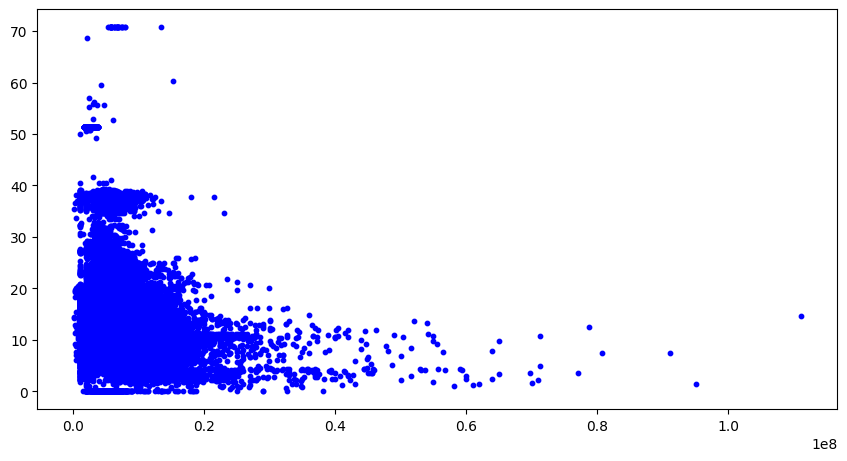

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sber_data = pd.read_csv('data/sber_data.csv')
sber_data['price_doc'].max()


# Task 2.4

# eco_price_data = sber_data[ sber_data['price_doc'] < 0.4*1e8 ]

# fig = plt.figure(figsize=(10, 7))
# boxplot = sns.boxplot(
#     data=eco_price_data,
#     y='ecology',
#     x='price_doc',
#     orient='h',
#     width=0.9
# )

# Task 2.5

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=sber_data['price_doc'], 
    y=sber_data['kremlin_km'], 
    s=10,
    marker='o',
    c = 'blue'
);

# Unit 4

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sber_data = pd.read_csv('data/sber_data.csv')

cols_null_percent = sber_data.isnull().mean() * 100

cols_null_percent.nlargest(10)

sber_data['hospital_beds_raion'].nlargest(20)

6       4849.0
694     4849.0
1151    4849.0
1545    4849.0
1694    4849.0
1781    4849.0
1913    4849.0
2124    4849.0
2651    4849.0
2657    4849.0
3245    4849.0
3528    4849.0
5979    4849.0
7360    4849.0
7685    4849.0
8271    4849.0
8565    4849.0
9205    4849.0
9723    4849.0
9872    4849.0
Name: hospital_beds_raion, dtype: float64

In [ ]:
# Task 4.6

import pandas as pd
import numpy as np

origin_df = pd.read_csv('test_data.csv')

df = origin_df.copy()

n = df.shape[0]

df = df.dropna(thresh=n*0.5, axis = 1)

m = df.shape[1]
df = df.dropna(thresh=m-2, axis = 0)

values = {
    'one': df['one'].mean(),
    'two': df['two'].mean(),
    'three': df['three'].mean(),
    'four': df['four'].mode()[0] 
    }

df = df.fillna(values)

# Unit 6

In [33]:

import pandas as pd
import numpy as np

origin_df = pd.read_csv('data\sber_data.csv', sep=',')

df = origin_df.copy()



outliers = df[df['life_sq'] > df['full_sq']]
# display(outliers)
# df.info() # 30471

cleaned = df.drop(outliers.index, axis=0)
# cleaned.info()  # 30434



<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\nitys\AppData\Local\Temp\ipykernel_20560\1951393153.py:4: SyntaxWarning: invalid escape sequence '\s'
  origin_df = pd.read_csv('data\sber_data.csv', sep=',')


<class 'pandas.core.frame.DataFrame'>
Index: 30434 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30434 non-null  int64  
 1   full_sq                                30434 non-null  int64  
 2   life_sq                                24051 non-null  float64
 3   floor                                  30268 non-null  float64
 4   sub_area                               30434 non-null  object 
 5   preschool_quota                        23754 non-null  float64
 6   preschool_education_centers_raion      30434 non-null  int64  
 7   school_quota                           23757 non-null  float64
 8   school_education_centers_raion         30434 non-null  int64  
 9   school_education_centers_top_20_raion  30434 non-null  int64  
 10  hospital_beds_raion                    16009 non-null  float64
 11  healthc

**Task 6.1**

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\nitys\AppData\Local\Temp\ipykernel_17424\693934761.py:6: SyntaxWarning: invalid escape sequence '\s'
  sber_data = pd.read_csv('data\sber_data.csv', sep=',')


Число выбросов по методу Тьюки: 59
Результирующее число записей: 30412


Text(0.5, 1.0, 'Cleaned full square distribution')

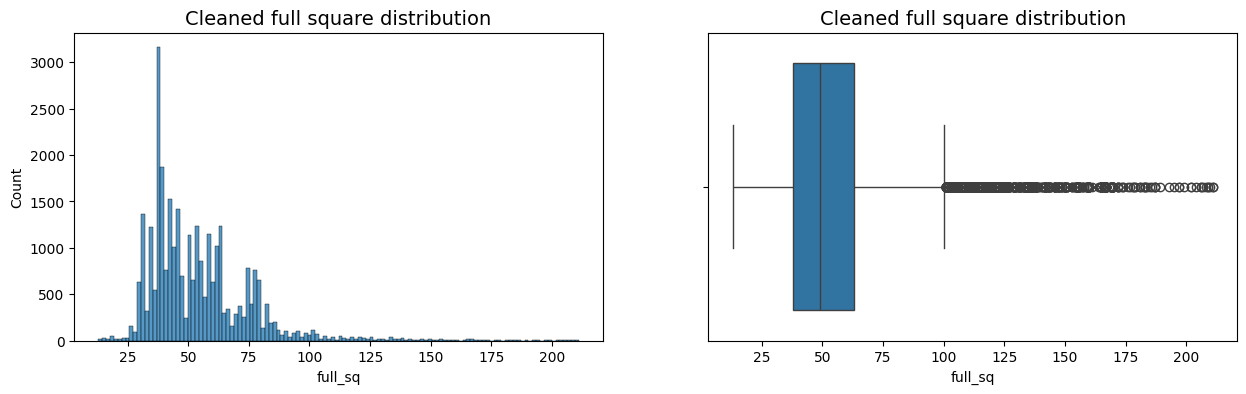

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sber_data = pd.read_csv('data\sber_data.csv', sep=',')


# outliers_iqr_mod`

def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(sber_data, 'full_sq', left = 1, right=6)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


# ____________________ ВНЕ ЗАДАНИЯ 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0])
histplot.set_title('Cleaned full square distribution', fontsize = 14)

boxplot = sns.boxplot(data = cleaned, x='full_sq', ax=axes[1])
boxplot.set_title('Cleaned full square distribution', fontsize = 14)

**Task 6.3**

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\nitys\AppData\Local\Temp\ipykernel_17424\1189530222.py:6: SyntaxWarning: invalid escape sequence '\s'
  sber_data = pd.read_csv('data\sber_data.csv', sep=',')


Original count:  30471
Clened count:  30471


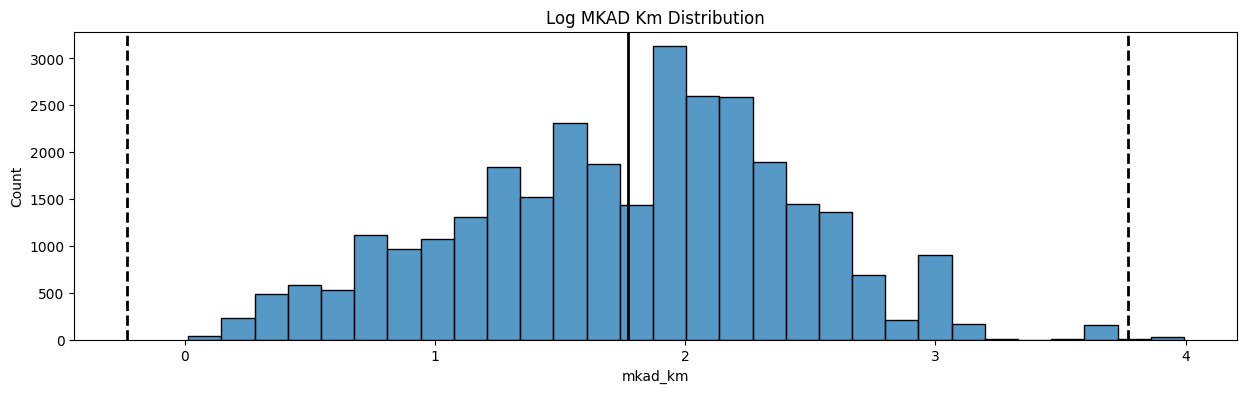

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sber_data = pd.read_csv('data\sber_data.csv', sep=',')

# def outliers_z_score(data, feature, log_scale=False):
#     if log_scale:
#         x = np.log(data[feature]+1)
#     else:
#         x = data[feature]
#     mu = x.mean()
#     sigma = x.std()
#     lower_bound = mu - 3 * sigma
#     upper_bound = mu + 3 * sigma
#     outliers = data[(x < lower_bound) | (x > upper_bound)]
#     cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
#     return outliers, cleaned

test_sber_data = sber_data.copy()

def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_z_score_mod(test_sber_data, 'mkad_km', log_scale=True, right = 3.5)

fig, ax = plt.subplots(1,1, figsize=(15,4))
log_mkad_km = np.log(test_sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

print('Original count: ', sber_data.shape[0])
print('Clened count: ', cleaned.shape[0])

**Task 6.5**

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\nitys\AppData\Local\Temp\ipykernel_30944\3141422061.py:6: SyntaxWarning: invalid escape sequence '\s'
  sber_data = pd.read_csv('data\sber_data.csv', sep=',')


count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64


Text(0.5, 1.0, 'Распределение цены')

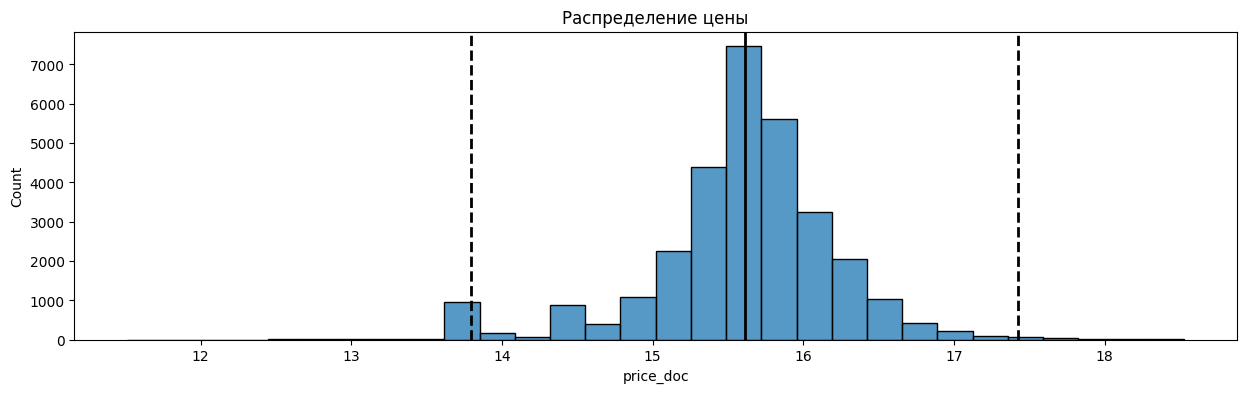

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sber_data = pd.read_csv('data\sber_data.csv', sep=',')


test_sber_data = sber_data.copy()

def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


# outliers, cleaned = outliers_z_score_mod(test_sber_data, 'mkad_km', log_scale=True, right = 3.5)

# fig, ax = plt.subplots(1,1, figsize=(15,4))
# price_doc = np.log(test_sber_data['price_doc'] + 1)
# histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
# histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
# histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
# histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
# histplot.set_title('Log MKAD Km Distribution');

fig, ax = plt.subplots(1,1, figsize=(15,4))

print(test_sber_data['price_doc'].describe())

price_doc = np.log(test_sber_data['price_doc'])
histplot = sns.histplot(price_doc, bins=30, ax=ax)
histplot.axvline(price_doc.mean(), color='k', lw=2 )
histplot.axvline(price_doc.mean() + 3*price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(price_doc.mean() - 3*price_doc.std(), color='k', ls='--', lw=2)
histplot.set_title('Распределение цены')


**Task 6.5**

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\nitys\AppData\Local\Temp\ipykernel_30944\297225701.py:6: SyntaxWarning: invalid escape sequence '\s'
  sber_data = pd.read_csv('data\sber_data.csv', sep=',')


Text(0.5, 1.0, 'Распределение цены')

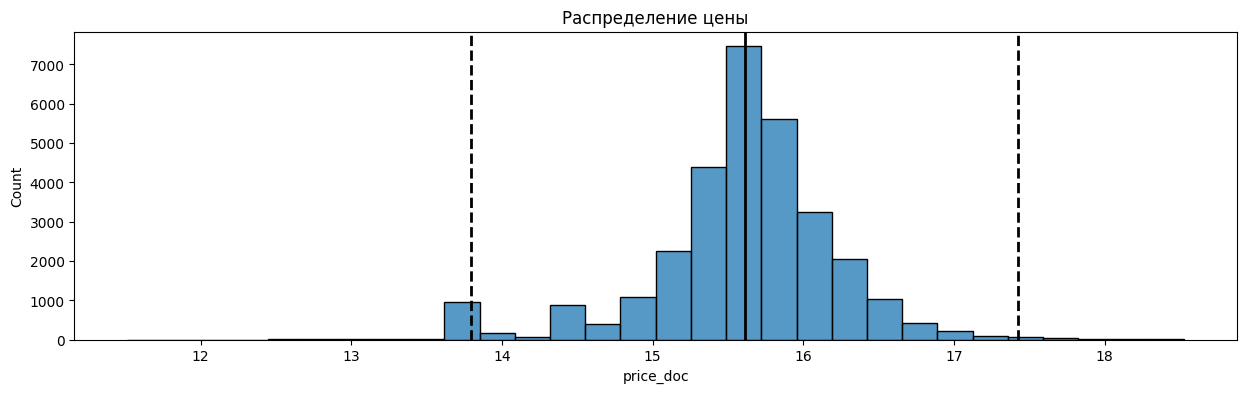

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sber_data = pd.read_csv('data\sber_data.csv', sep=',')


test_sber_data = sber_data.copy()

fig, ax = plt.subplots(1,1, figsize=(15,4))

price_doc = np.log(test_sber_data['price_doc'])
histplot = sns.histplot(price_doc, bins=30, ax=ax)
histplot.axvline(price_doc.mean(), color='k', lw=2 )
histplot.axvline(price_doc.mean() + 3*price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(price_doc.mean() - 3*price_doc.std(), color='k', ls='--', lw=2)
histplot.set_title('Распределение цены')

**Task 6.6**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sber_data = pd.read_csv('data\sber_data.csv', sep=',')
test_sber_data = sber_data.copy()


def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_z_score_mod(test_sber_data, 'price_doc', log_scale=True, left=3.7, right=3.7)
outliers.shape[0]

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\nitys\AppData\Local\Temp\ipykernel_30944\3285813885.py:6: SyntaxWarning: invalid escape sequence '\s'
  sber_data = pd.read_csv('data\sber_data.csv', sep=',')


52

**Task 6.7**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(test_sber_data, 'price_doc', log_scale=True, left=3, right=3)

outliers.shape[0]

92

In [16]:
def check_number_sign(number):
    return 0 if number == 0 else int(number/abs(number))

check_number_sign(50)

1

# Unit 8

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.describe()
diabetes[diabetes['BloodPressure']==0].count()

diabetes_columns = list(diabetes.columns)

# diabetes.shape[0] # 778

### TASK 8.1

mask = diabetes.duplicated(subset=diabetes_columns)

diabetes_dublicates = diabetes[mask]

diabetes_dublicates.shape[0]

diabetes = diabetes.drop_duplicates(subset=diabetes_columns)
diabetes.shape[0] # 778


### TASK 8.2

low_information_cols = []

for col in diabetes.columns:
    top_freq = diabetes[col].value_counts(normalize=True).max()
    
    nunique_ration = diabetes[col].nunique()/diabetes[col].count()
    
    if top_freq > 0.95:
        low_information_cols.append(col)
    if nunique_ration > 0.95:
        low_information_cols.append(col)

low_information_cols



diabetes = diabetes.drop(low_information_cols, axis = 1)

# display(diabetes)

### TASK 8.3

np.nan


diabetes_columns_rep = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in diabetes_columns_rep:
    diabetes[col] = diabetes[col].apply(lambda x: np.nan if x == 0 else x)
    
diabetes['Insulin'].isnull().value_counts(normalize=True)

### Task 8.4

diabetes_dropped = diabetes.dropna(thresh=0.7*diabetes.shape[0], axis=1)
diabetes_dropped_list = list(diabetes_dropped.columns)
len(diabetes_dropped_list)
# diabetes_dropped.shape  # (768. 8)


### Task 8.5

m = diabetes_dropped.shape[1]
diabetes_dropped_2 = diabetes_dropped.dropna(thresh=m-2, axis=0)
diabetes_dropped_2.shape[0]

### TASK 8.6

# values_1 = {}
# for col in list(diabetes_dropped_2.columns):
#     values_1.update( {col: f'fill_data[{col}].median()'} )
    

# print(values_1)

fill_data = diabetes_dropped_2.copy()
values={
   'Pregnancies': fill_data['Pregnancies'].median(),
 'Glucose': fill_data['Glucose'].median(),
 'BloodPressure': fill_data['BloodPressure'].median(),
 'SkinThickness': fill_data['SkinThickness'].median(),
 'BMI': fill_data['BMI'].median(),
 'DiabetesPedigreeFunction': fill_data['DiabetesPedigreeFunction'].median(),
 'Age': fill_data['Age'].median(),
 'Outcome': fill_data['Outcome'].median()
  }

diabetes_filled = fill_data.fillna(values)

diabetes_filled['SkinThickness'].mean()


### TASK 8.7

def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(diabetes_filled, 'SkinThickness')
# print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
# print(f'Результирующее число записей: {cleaned.shape[0]}')



###  TASK 8.8


def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_z_score_mod(diabetes_filled, 'SkinThickness')
# print(f'Число выбросов по 3 сигм: {outliers.shape[0]}')
# print(f'Результирующее число записей: {cleaned.shape[0]}')



###  TASK 8.9

def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(diabetes_filled, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки без логарифмирования: {outliers.shape[0]}')


def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    
    x = np.log(data[feature])
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(diabetes_filled, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки с логарифмированием: {outliers.shape[0]}')


Число выбросов по методу Тьюки без логарифмирования: 29
Число выбросов по методу Тьюки с логарифмированием: 0


# Bonus Level

<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:54: SyntaxWarning: invalid escape sequence '\m'
C:\Users\nitys\AppData\Local\Temp\ipykernel_20508\3786541727.py:9: SyntaxWarning: invalid escape sequence '\D'
  data_parsing = pd.read_excel('Data\Data_TSUM.xlsx', sheet_name='Data_Parsing')
C:\Users\nitys\AppData\Local\Temp\ipykernel_20508\3786541727.py:10: SyntaxWarning: invalid escape sequence '\D'
  data_company = pd.read_excel('Data\Data_TSUM.xlsx', sheet_name='Data_Company')
C:\Users\nitys\AppData\Local\Temp\ipykernel_20508\3786541727.py:54: SyntaxWarning: invalid escape sequence '\m'
  merged.to_excel('data\merged.xlsx')


,brand,Category,item_id,producer_color,parsing_price,color_id,company_price,diff_price
0,Valentino,Shoes,aaaaa111111,black,167,black,247,-32.39
1,Valentino,Shoes,aaaaa111112,black,188,black,161,16.77
2,Valentino,Shoes,aaaaa111113,black,184,black,234,-21.37
3,Valentino,Shoes,aaaaa111114,black,196,black,167,17.37
4,Valentino,Shoes,aaaaa111115,black,250,black,153,63.40


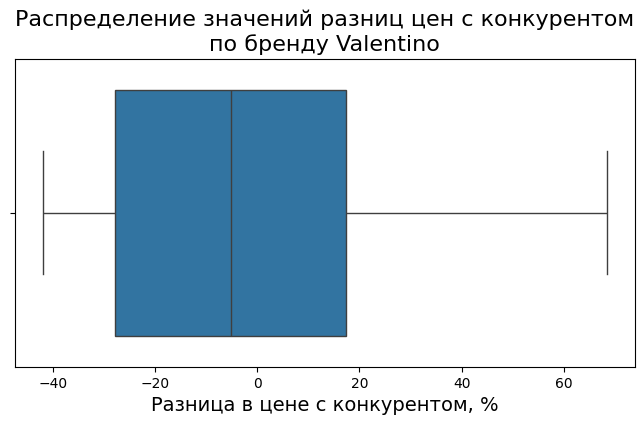

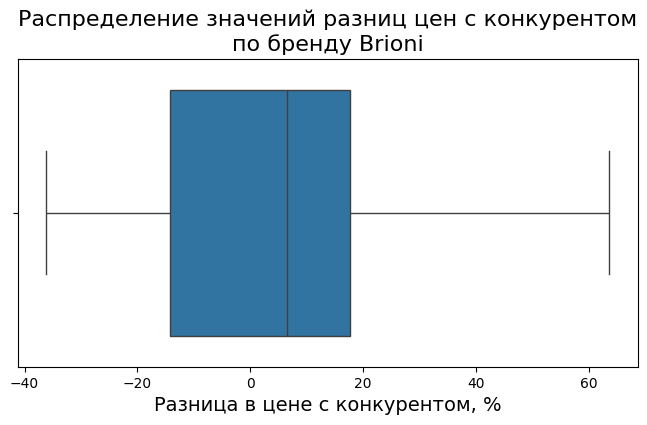

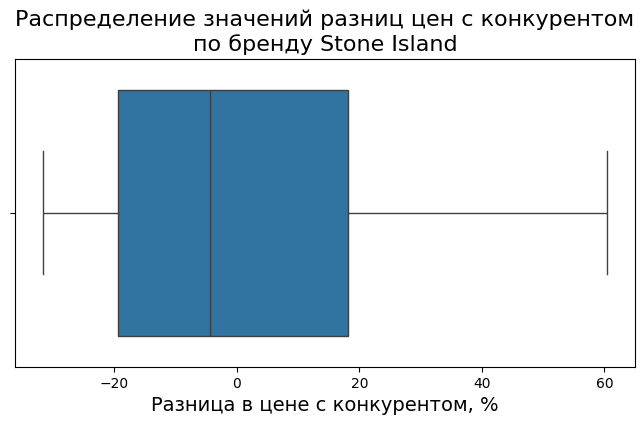

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data_parsing = pd.read_excel('Data\Data_TSUM.xlsx', sheet_name='Data_Parsing')
data_company = pd.read_excel('Data\Data_TSUM.xlsx', sheet_name='Data_Company')


def name_cleaner(name):
    new_w = ''
    for elem in name:
        symbols_list = [ '_', '-', '~', '\\', '/' ]
        for n in range(len(elem)):
            if elem[n] not in symbols_list:
                new_w += elem[n]
    return new_w

data_parsing['producer_id'] = data_parsing['producer_id'].apply(name_cleaner)
data_parsing['producer_color'] = data_parsing['producer_color'].apply(name_cleaner)


data_parsing = data_parsing.rename(columns={'producer_id': 'item_id'})
data_parsing = data_parsing.rename(columns={'price': 'parsing_price'})
data_company = data_company.rename(columns={'current price': 'company_price'})
data_company = data_company.drop(['brand', 'Category'], axis=1)


merged = data_parsing.merge(
    data_company,
    on='item_id',
    how='left'
    )


merged['diff_price'] = round(
    (merged['parsing_price'] - merged['company_price'])/merged['company_price']*100, 2)


display(merged.head())

merged['brand'].value_counts()

for brand in merged['brand'].value_counts().index:
    fig, ax = plt.subplots(1,1, figsize = (8,4))
    boxplot = sns.boxplot(merged[
        merged['brand'] == brand]['diff_price'], ax=ax, orient='h')
    boxplot.set_title( ('Распределение значений разниц цен с конкурентом' + '\n' + 'по бренду ' + brand), fontsize=16)
    boxplot.set_xlabel('Разница в цене с конкурентом, %', fontsize=14)
    
# merged.to_excel('data\merged.xlsx')